In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [7]:
#
ds = pd.read_csv('Xas_data.csv')
df = pd.DataFrame(ds)
df.head()

,Temperature,N_Pd-Pd,sigma2_Pd-Pd,R_Pd-Pd,24250.00000000,24251.00000000,24252.00000000,24253.00000000,24254.00000000,24255.00000000,...,24890.00000000,24891.00000000,24892.00000000,24893.00000000,24894.00000000,24895.00000000,24896.00000000,24897.00000000,24898.00000000,24899.00000000
0,100.027168,11.583236,0.010353,2.798787,-0.002941,-0.002101,0.000153,-0.000685,-0.001381,-0.001707,...,1.002640,1.000615,1.001076,1.001344,1.000598,1.000114,1.000137,1.000263,1.001093,0.999722
1,105.068835,11.962774,0.010738,2.796946,0.000294,-0.000559,-0.001888,-0.000536,-0.003652,-0.002401,...,1.001469,1.000592,1.000888,0.999474,0.999035,0.998399,0.997240,0.998931,1.000950,0.999590
2,110.031551,11.971087,0.011105,2.785716,-0.000163,-0.001722,-0.001149,-0.002046,-0.002247,-0.001394,...,1.000922,1.000398,1.000643,1.002966,1.002819,1.002682,1.000569,0.999811,0.999026,0.999348
3,115.016893,11.785187,0.010816,2.780199,-0.001493,-0.003586,-0.002962,-0.001929,-0.003136,-0.003144,...,1.004211,1.000640,1.005900,1.003956,1.002890,1.004873,1.003370,1.003057,0.999871,0.999300
4,120.026416,11.099161,0.009863,2.762011,-0.001646,-0.001257,-0.002230,-0.002064,-0.001292,-0.001445,...,1.004205,1.004148,1.003273,1.002915,0.998383,0.999823,1.002702,1.003936,1.001347,1.003279


In [8]:
df = df[[c for c in df if c not in ['Temperature', 'N_Pd-Pd', 'sigma2_Pd-Pd', 'R_Pd-Pd']] + ['Temperature', 'sigma2_Pd-Pd', 'R_Pd-Pd','N_Pd-Pd']]
df_tr = df[['Temperature', 'sigma2_Pd-Pd', 'R_Pd-Pd','N_Pd-Pd']]
df = df.drop(columns=['Temperature', 'sigma2_Pd-Pd', 'R_Pd-Pd','N_Pd-Pd'])
df_tr.head()
#df.head()

,Temperature,sigma2_Pd-Pd,R_Pd-Pd,N_Pd-Pd
0,100.027168,0.010353,2.798787,11.583236
1,105.068835,0.010738,2.796946,11.962774
2,110.031551,0.011105,2.785716,11.971087
3,115.016893,0.010816,2.780199,11.785187
4,120.026416,0.009863,2.762011,11.099161


In [44]:
#ss = StandardScaler()
mm = MinMaxScaler()
#scaled = ss.fit_transform(df)
scaled = mm.fit_transform(df)
scaled

array([[0.29156834, 0.43564311, 0.70062724, ..., 0.43824111, 0.50997448,
        0.39110308],
       [0.61331873, 0.69741147, 0.40583605, ..., 0.34178902, 0.49954431,
        0.38019064],
       [0.56785519, 0.5001137 , 0.51268053, ..., 0.40551238, 0.35910765,
        0.36029013],
       ...,
       [0.35022071, 0.42274476, 0.37061803, ..., 0.53444172, 0.56838477,
        0.57006525],
       [0.3624342 , 0.4784955 , 0.44223685, ..., 0.47104585, 0.47314076,
        0.46249283],
       [0.39102107, 0.4886019 , 0.4505246 , ..., 0.50266999, 0.54788887,
        0.54691636]])

In [45]:
dt = pd.DataFrame(scaled)
#d_temp = dt[[650,651,652,653]]
d_save = dt
#dt = dt.drop(columns=[650,651,652,653])
#d_temp.head()
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,640,641,642,643,644,645,646,647,648,649
0,0.291568,0.435643,0.700627,0.639259,0.571242,0.549583,0.380291,0.636885,0.556006,0.515093,...,0.580607,0.458044,0.466737,0.496072,0.464933,0.406166,0.331253,0.438241,0.509974,0.391103
1,0.613319,0.697411,0.405836,0.659839,0.233373,0.470382,0.568298,0.805007,0.546507,0.627082,...,0.500632,0.456320,0.451590,0.354686,0.354566,0.280629,0.097053,0.341789,0.499544,0.380191
2,0.567855,0.500114,0.512681,0.451128,0.442395,0.585401,0.434540,0.447805,0.590299,0.502222,...,0.463287,0.442027,0.431895,0.618766,0.621726,0.594114,0.366224,0.405512,0.359108,0.360290
3,0.435566,0.183780,0.250845,0.467356,0.310231,0.385463,0.391843,0.569693,0.508327,0.346674,...,0.687920,0.459868,0.855203,0.693658,0.626742,0.754473,0.592777,0.640658,0.420790,0.356309
4,0.420326,0.579015,0.356454,0.448690,0.584454,0.579524,0.520306,0.436864,0.780451,0.446015,...,0.687467,0.718303,0.643649,0.614902,0.308499,0.384840,0.538706,0.704273,0.528459,0.684222


In [46]:
scaled = dt.to_numpy()
scaled

array([[0.29156834, 0.43564311, 0.70062724, ..., 0.43824111, 0.50997448,
        0.39110308],
       [0.61331873, 0.69741147, 0.40583605, ..., 0.34178902, 0.49954431,
        0.38019064],
       [0.56785519, 0.5001137 , 0.51268053, ..., 0.40551238, 0.35910765,
        0.36029013],
       ...,
       [0.35022071, 0.42274476, 0.37061803, ..., 0.53444172, 0.56838477,
        0.57006525],
       [0.3624342 , 0.4784955 , 0.44223685, ..., 0.47104585, 0.47314076,
        0.46249283],
       [0.39102107, 0.4886019 , 0.4505246 , ..., 0.50266999, 0.54788887,
        0.54691636]])

In [47]:
pca_test = PCA(n_components=650)
pca_test.fit(scaled)

PCA(n_components=650)

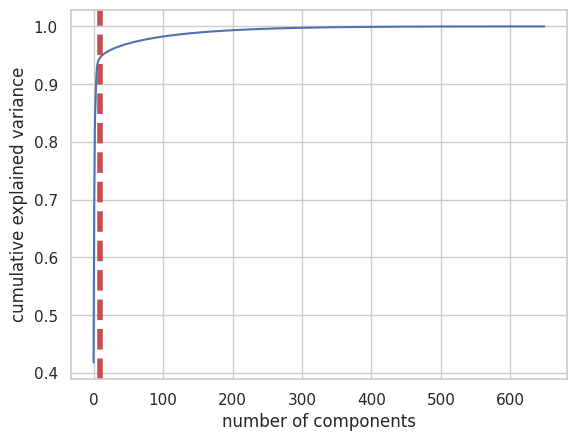

In [48]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
plt.show()
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

In [49]:
pca = PCA(n_components=10)
pca.fit(scaled)
train = pca.transform(scaled)
train

array([[ 2.52138835,  3.88164745,  0.25028283, ...,  0.25505281,
        -0.48539346,  0.02040394],
       [ 2.48419109,  3.55564478,  0.5525669 , ...,  0.20392791,
         0.07309579, -0.17194702],
       [ 2.53338815,  2.86951099,  0.68141918, ...,  0.18934433,
         0.48886549,  0.18800734],
       ...,
       [-4.24292253,  0.03910281,  1.41945288, ..., -0.12759347,
        -0.01136888,  0.02122575],
       [-4.11794559, -0.02446544,  1.1108313 , ..., -0.04680188,
        -0.13372714, -0.00738166],
       [-4.19821539,  0.0578443 ,  1.41889502, ..., -0.09531418,
        -0.03202918,  0.04312065]])

In [50]:
dp = pd.DataFrame(train)
dp.head()

,0,1,2,3,4,5,6,7,8,9
0,2.521388,3.881647,0.250283,0.729083,0.609571,-0.783068,0.227511,0.255053,-0.485393,0.020404
1,2.484191,3.555645,0.552567,0.448960,0.329706,-0.754446,0.225317,0.203928,0.073096,-0.171947
2,2.533388,2.869511,0.681419,0.442089,0.485380,-0.893055,-0.002058,0.189344,0.488865,0.188007
3,2.794067,2.021784,0.431742,0.692195,0.581215,-1.026921,0.295963,0.277555,0.275952,0.505272
4,2.964592,1.053194,1.454204,0.109716,0.536378,-0.934078,0.693653,0.082037,-0.119381,0.197269


In [51]:
dp = pd.concat([dp, df_tr], axis = 1)
d_save = pd.concat([d_save, df_tr], axis = 1)
dp.head()

,0,1,2,3,4,5,6,7,8,9,Temperature,sigma2_Pd-Pd,R_Pd-Pd,N_Pd-Pd
0,2.521388,3.881647,0.250283,0.729083,0.609571,-0.783068,0.227511,0.255053,-0.485393,0.020404,100.027168,0.010353,2.798787,11.583236
1,2.484191,3.555645,0.552567,0.448960,0.329706,-0.754446,0.225317,0.203928,0.073096,-0.171947,105.068835,0.010738,2.796946,11.962774
2,2.533388,2.869511,0.681419,0.442089,0.485380,-0.893055,-0.002058,0.189344,0.488865,0.188007,110.031551,0.011105,2.785716,11.971087
3,2.794067,2.021784,0.431742,0.692195,0.581215,-1.026921,0.295963,0.277555,0.275952,0.505272,115.016893,0.010816,2.780199,11.785187
4,2.964592,1.053194,1.454204,0.109716,0.536378,-0.934078,0.693653,0.082037,-0.119381,0.197269,120.026416,0.009863,2.762011,11.099161


In [52]:
dp.to_csv('All/PCA_data.csv', index=False)
d_save.to_csv('All/Normalize_data.csv', index=False)

In [53]:
for i in range(0,7):
    d_tmp = dp.sample(frac=1).reset_index(drop=True)
    temp = pd.DataFrame(d_tmp[0:1000].values)
    temp.to_csv('Variant/variant' + str(i) + '.csv', index=False)
    